In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
!pip install catboost
import catboost as cb
import missingno as msno


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 4.7 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_path = '/content/drive/My Drive/DS4B/train.csv'
test_path = '/content/drive/My Drive/DS4B/test.csv'


In [ ]:
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

In [ ]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<Axes: >

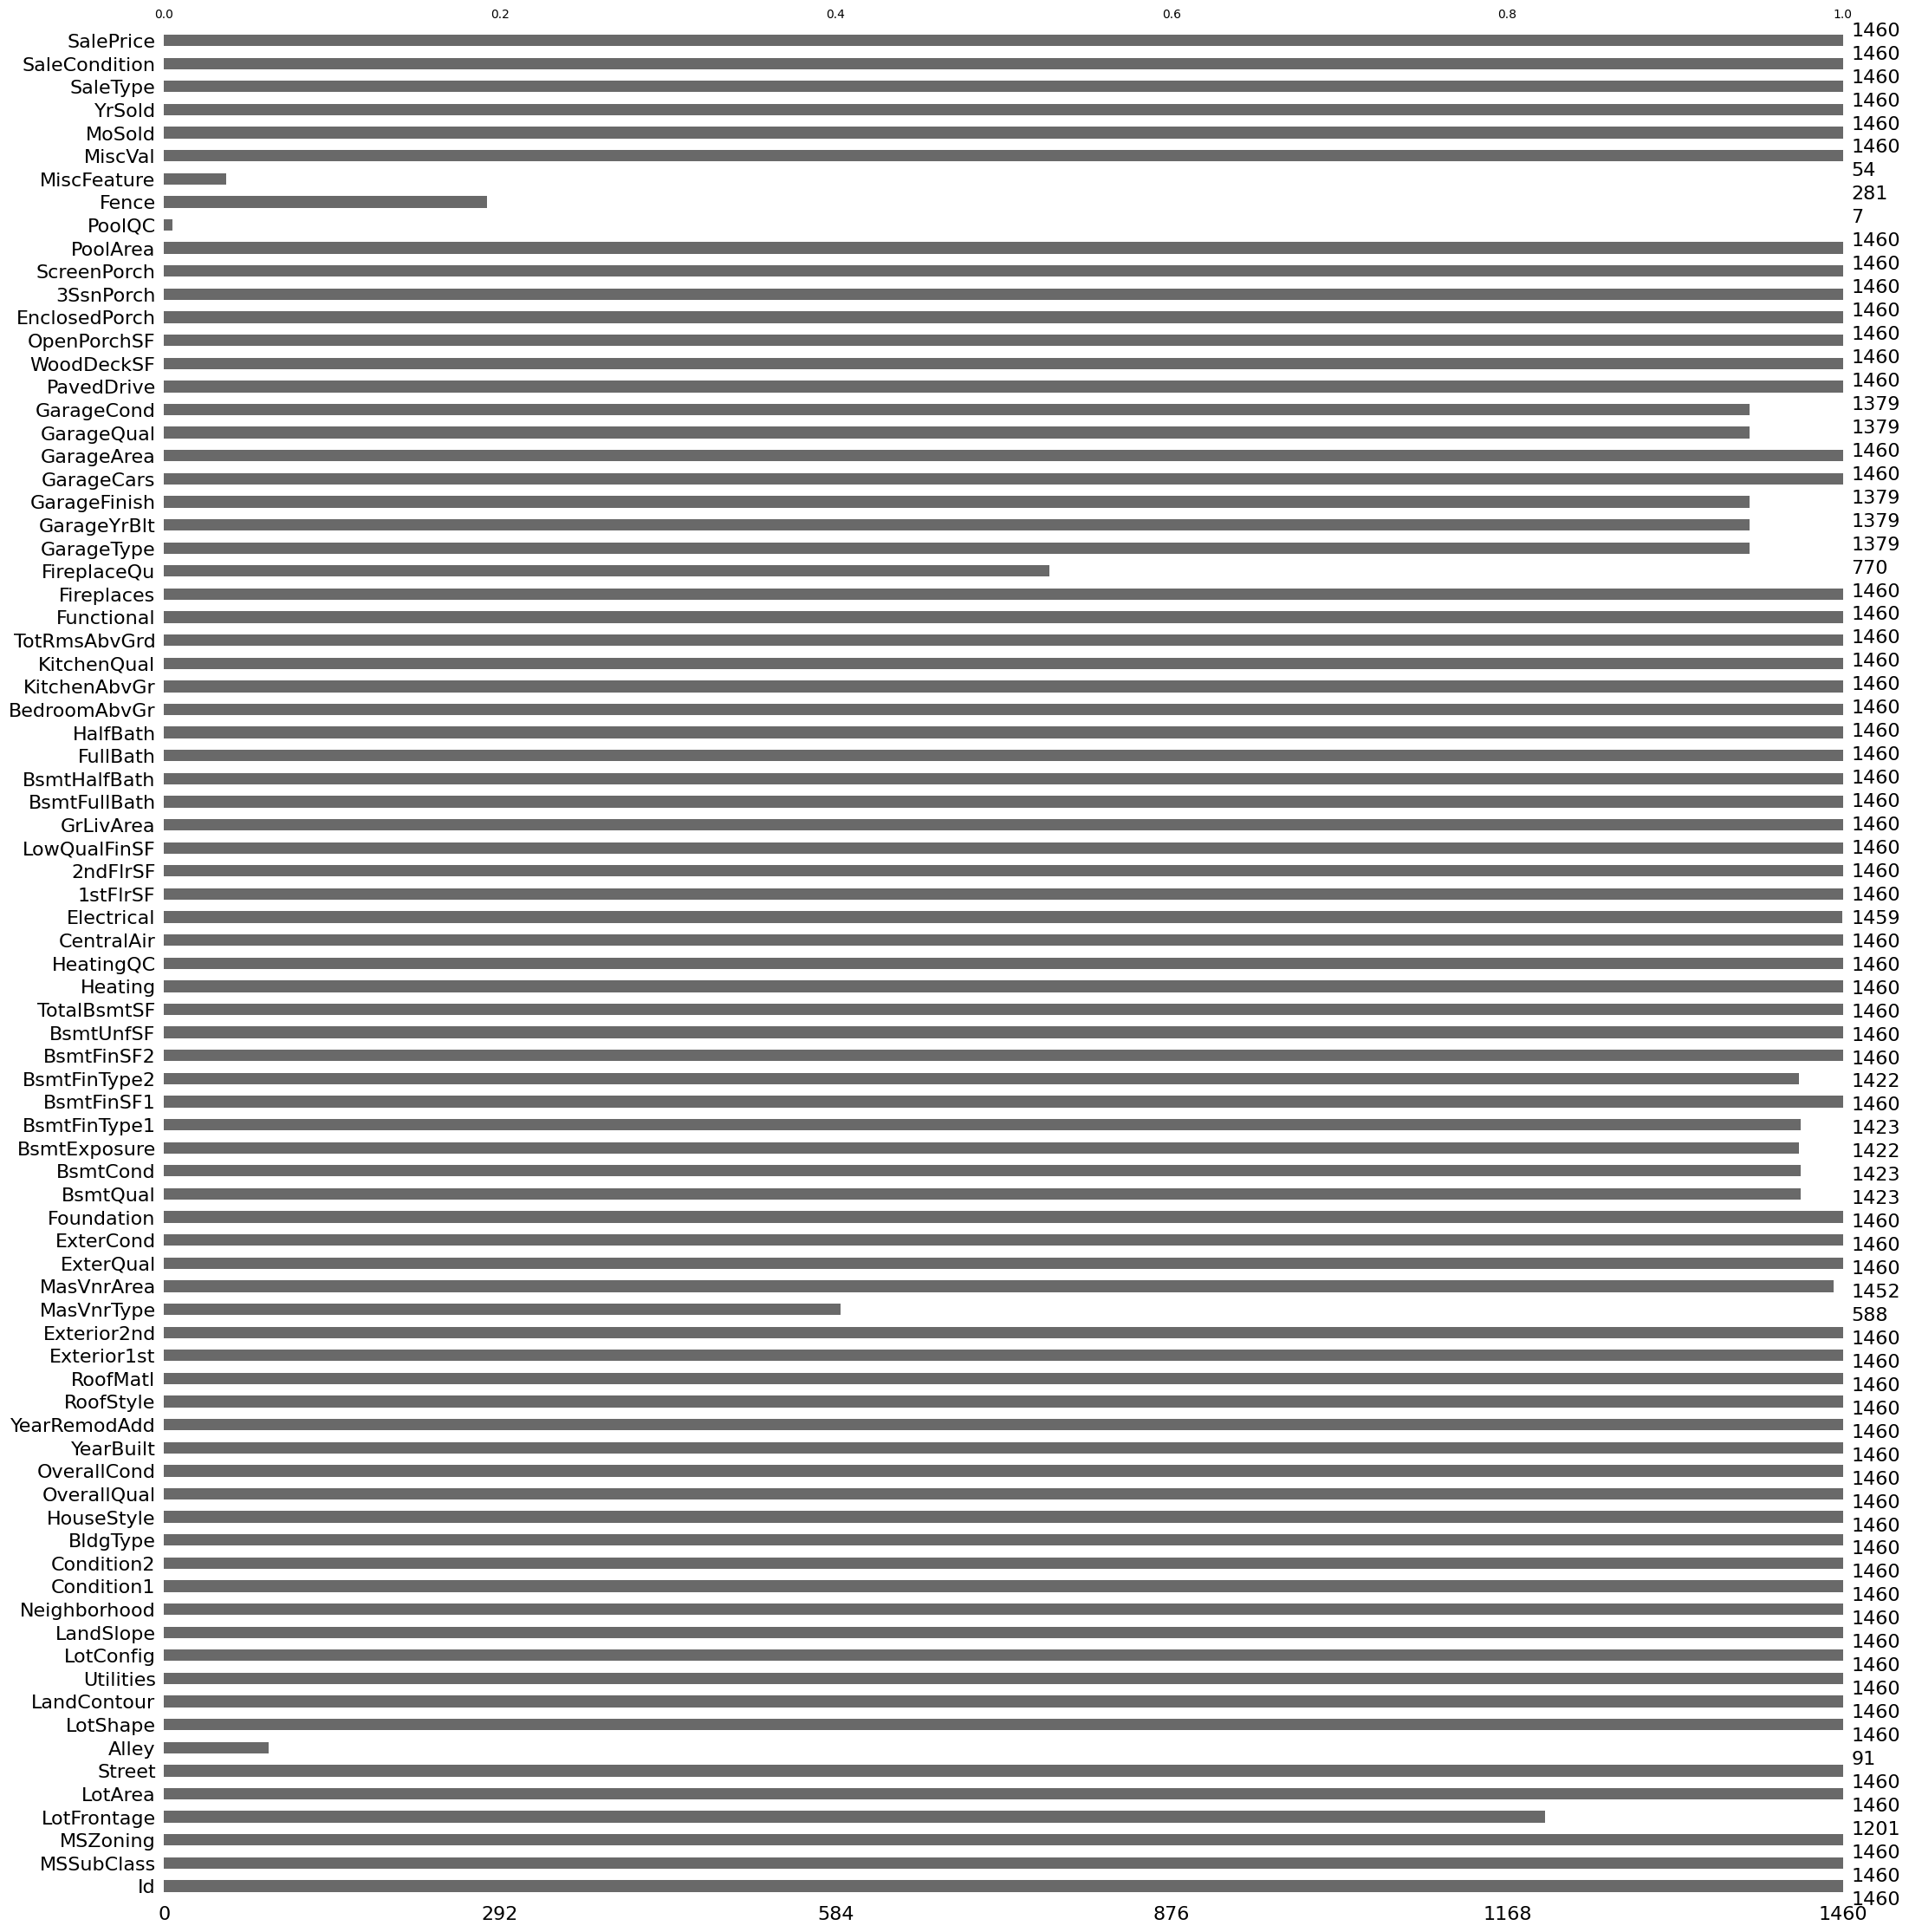

In [ ]:
msno.bar(train)

In [ ]:
train.MSZoning.unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [ ]:
train.drop(['Id', 'MSSubClass', 'MSZoning'], axis = 1, inplace = True)
test.drop(['Id', 'MSSubClass', 'MSZoning'], axis = 1, inplace = True)

In [ ]:
train.columns

Index(['LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       

In [ ]:
target = 'SalePrice'

X = train.drop(target, axis = 1)
y = train[target]

In [ ]:
test.columns

Index(['LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 254 to 1126
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    951 non-null    float64
 1   LotArea        1168 non-null   int64  
 2   Street         1168 non-null   object 
 3   Alley          74 non-null     object 
 4   LotShape       1168 non-null   object 
 5   LandContour    1168 non-null   object 
 6   Utilities      1168 non-null   object 
 7   LotConfig      1168 non-null   object 
 8   LandSlope      1168 non-null   object 
 9   Neighborhood   1168 non-null   object 
 10  Condition1     1168 non-null   object 
 11  Condition2     1168 non-null   object 
 12  BldgType       1168 non-null   object 
 13  HouseStyle     1168 non-null   object 
 14  OverallQual    1168 non-null   int64  
 15  OverallCond    1168 non-null   int64  
 16  YearBuilt      1168 non-null   int64  
 17  YearRemodAdd   1168 non-null   int64  
 18  RoofStyle  

In [ ]:
categorical_features = X.select_dtypes(include=['object']).columns.tolist()


In [ ]:
# Fill NaN values in categorical columns with a placeholder string 'missing'
X_train[categorical_features] = X_train[categorical_features].fillna('missing')
X_test[categorical_features] = X_test[categorical_features].fillna('missing')

#### >>>>> Need to check how missing data was preprocessed prior

In [ ]:
# first pass catboost
param_grid = {
    'iterations': [500, 1000, 1500],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5]
}

model = cb.CatBoostRegressor(cat_features=categorical_features, loss_function='RMSE', verbose=100)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=3)
grid_search.fit(X_train, y_train)


best_model = grid_search.best_estimator_


predictions = best_model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Mean Squared Error: {mse}')

Fitting 3 folds for each of 81 candidates, totalling 243 fits
0:	learn: 75443.1399178	total: 19ms	remaining: 9.47s
100:	learn: 45928.9521065	total: 1.77s	remaining: 6.99s
200:	learn: 33570.3529335	total: 2.86s	remaining: 4.26s
300:	learn: 27301.7147813	total: 3.95s	remaining: 2.61s
400:	learn: 23827.2381328	total: 5.02s	remaining: 1.24s
499:	learn: 21809.4317293	total: 6.08s	remaining: 0us
[CV 1/3] END depth=4, iterations=500, l2_leaf_reg=1, learning_rate=0.01;, score=-797082759.649 total time=   6.2s
0:	learn: 75331.8285392	total: 10.9ms	remaining: 5.44s
100:	learn: 45041.0966360	total: 1.05s	remaining: 4.14s
200:	learn: 32449.0378493	total: 2.1s	remaining: 3.13s
300:	learn: 26614.6112367	total: 3.19s	remaining: 2.11s
400:	learn: 23377.5548731	total: 4.24s	remaining: 1.05s
499:	learn: 21262.4323112	total: 5.45s	remaining: 0us
[CV 2/3] END depth=4, iterations=500, l2_leaf_reg=1, learning_rate=0.01;, score=-1131630926.416 total time=   5.6s
0:	learn: 79336.4429144	total: 19.6ms	remainin

In [ ]:

# Initialize CatBoostRegressor
model = cb.CatBoostRegressor(iterations=1000,
                             learning_rate=0.1,
                             depth=6,
                             l2_leaf_reg = 1,
                             cat_features=categorical_features,  # Specify categorical features here
                             loss_function='RMSE',
                             verbose=100)

# Fit model
model.fit(X_train, y_train, eval_set=(X_test, y_test), plot=True)


predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)

print(f'Mean Squared Error: {mse}')

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 72383.5039154	test: 83003.4111187	best: 83003.4111187 (0)	total: 135ms	remaining: 2m 14s
100:	learn: 14955.3793172	test: 27941.3453830	best: 27941.3453830 (100)	total: 7.06s	remaining: 1m 2s
200:	learn: 10534.2520761	test: 26815.9641705	best: 26815.9641705 (200)	total: 10.3s	remaining: 40.8s
300:	learn: 8073.1572397	test: 26588.7952794	best: 26580.3314912 (299)	total: 13.3s	remaining: 30.8s
400:	learn: 6484.7339686	test: 26428.2528937	best: 26428.2528937 (400)	total: 16.8s	remaining: 25.1s
500:	learn: 5402.2136064	test: 26279.4426396	best: 26278.7165664 (499)	total: 21.8s	remaining: 21.7s
600:	learn: 4568.2345373	test: 26207.3710628	best: 26207.3710628 (600)	total: 24.9s	remaining: 16.5s
700:	learn: 3965.5024214	test: 26174.5541233	best: 26174.0096424 (694)	total: 28.1s	remaining: 12s
800:	learn: 3387.8985610	test: 26166.4160894	best: 26148.8677872 (733)	total: 31.2s	remaining: 7.75s
900:	learn: 2971.0063157	test: 26134.6889150	best: 26119.9833468 (856)	total: 36.3s	remaining

In [ ]:
lasso_train =  '/content/drive/My Drive/DS4B/train.csv'